# 1.. Import required libraries and read the dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('honeyproduction.csv')
data

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
data.copy()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [4]:
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
data.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [6]:
data.size

5008

In [7]:
data.shape

(626, 8)

In [8]:
data.ndim

2

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [10]:
data.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [11]:
data.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

# 3. Display the percentage distribution of the data in each year using the pie chart.


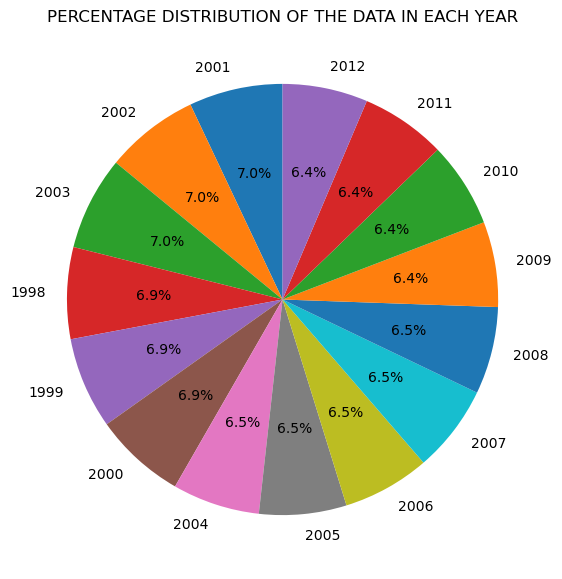

In [12]:
count_of_year = data['year'].value_counts()

#labels and counts for the pie chart
labels = count_of_year.index
counts = count_of_year.values

#creating a pie chart
plt.figure(figsize = (7,7))
plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('PERCENTAGE DISTRIBUTION OF THE DATA IN EACH YEAR')
plt.show()

# Inference
* The pie chart illustrates the percentage distribution of data across different years.
* By visually comparing the sizes of the pie slices, we can see which years have a larger or smaller share of the data in each year.
* Over the decade distribution of honey has been reduced from 7 percentage to 6.4 percentage in 2012.

# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

<Figure size 500x500 with 0 Axes>

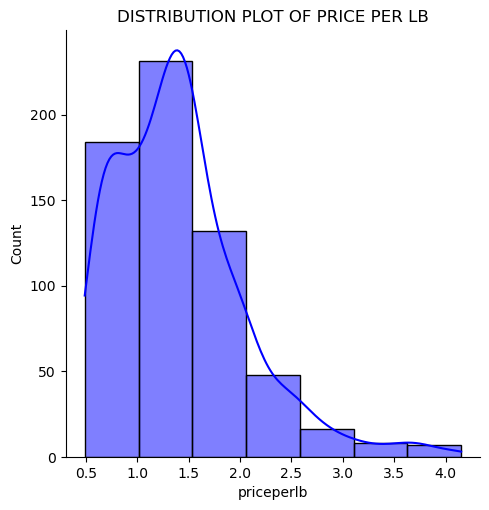

In [13]:
plt.figure(figsize=(5,5))
sns.displot(data = data['priceperlb'], kde = True, bins = 7, color = 'blue', common_norm = True)
plt.title('DISTRIBUTION PLOT OF PRICE PER LB')
plt.show()

# Inference
* The distribution plot of price per lb is right skewed which is positively skewed.
* In this displot we observe a roughly symmetric distribution with a single peak around 1.0perlb.
* This says that the majority of onservations in the data set fall within this price range, making it the central tendency.
* The spread of prices per pound ranges from 0.5 to 4.0 per lb, indicating some variability.

# 5.Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and wite your findings

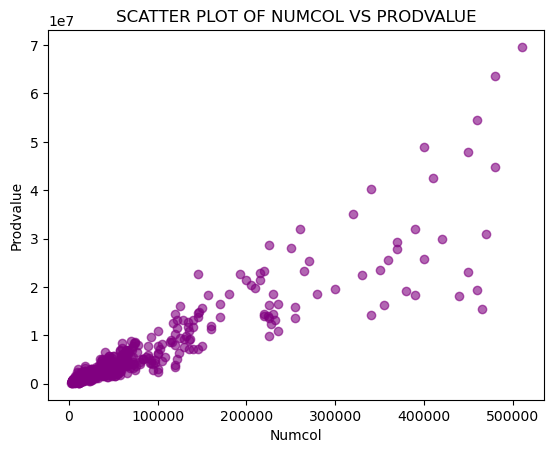

In [14]:
Numcol = data['numcol']
Prodval = data['prodvalue']

#plot scatter plot
plt.scatter(Numcol,Prodval,color='purple',alpha=0.6)

#add title and axes labels 
plt.title('SCATTER PLOT OF NUMCOL VS PRODVALUE')
plt.xlabel('Numcol')
plt.ylabel('Prodvalue')
plt.show()

# Inference
* The scatter plot shows a positive linear relationship between the number of honey colonies (numcol) and production value (prodvalue). As the number of colonies increases there is a corresponding increase in production value. This suggests that number of colonies is a good predictor of production value.
* If the aim is to increase the prodcution then increasing the number of colonies would be a good strategy. However its important to check fo other factors that influence production value.

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

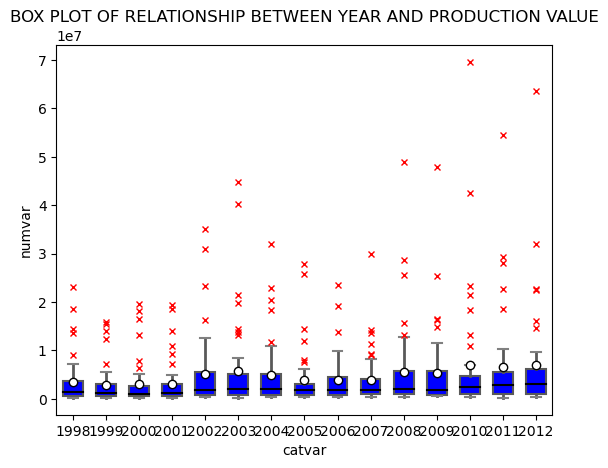

In [15]:
catvar ='year'
numvar ='prodvalue'

#plot box plot
sns.boxplot(data=data,x='year',y='prodvalue',
           palette ='Set2',
            orient='v',
            width = 0.6,
            linewidth=1.5,
           showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"},
           showcaps=True,boxprops = {"facecolor":"blue"},
           whiskerprops={"linewidth":2},
           flierprops={"marker":"x","markerfacecolor":"red",
                      "markeredgecolor":"red"}, capprops={"color":"gray"},medianprops={"color":"black"},
           showfliers=True)

#add title and axes labels 
plt.title('BOX PLOT OF RELATIONSHIP BETWEEN YEAR AND PRODUCTION VALUE')
plt.xlabel('catvar')
plt.ylabel('numvar')
plt.show()

# Inference
* The boxplot clearly shows the distribution of production value for each year.
* Outliers, shown as individual points outside the whiskers of the boxplot. In this case, outliers are present.
* If the goal is to maximize production value, it may be worthwhile to investigate the factors that contributed to increase in production.

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

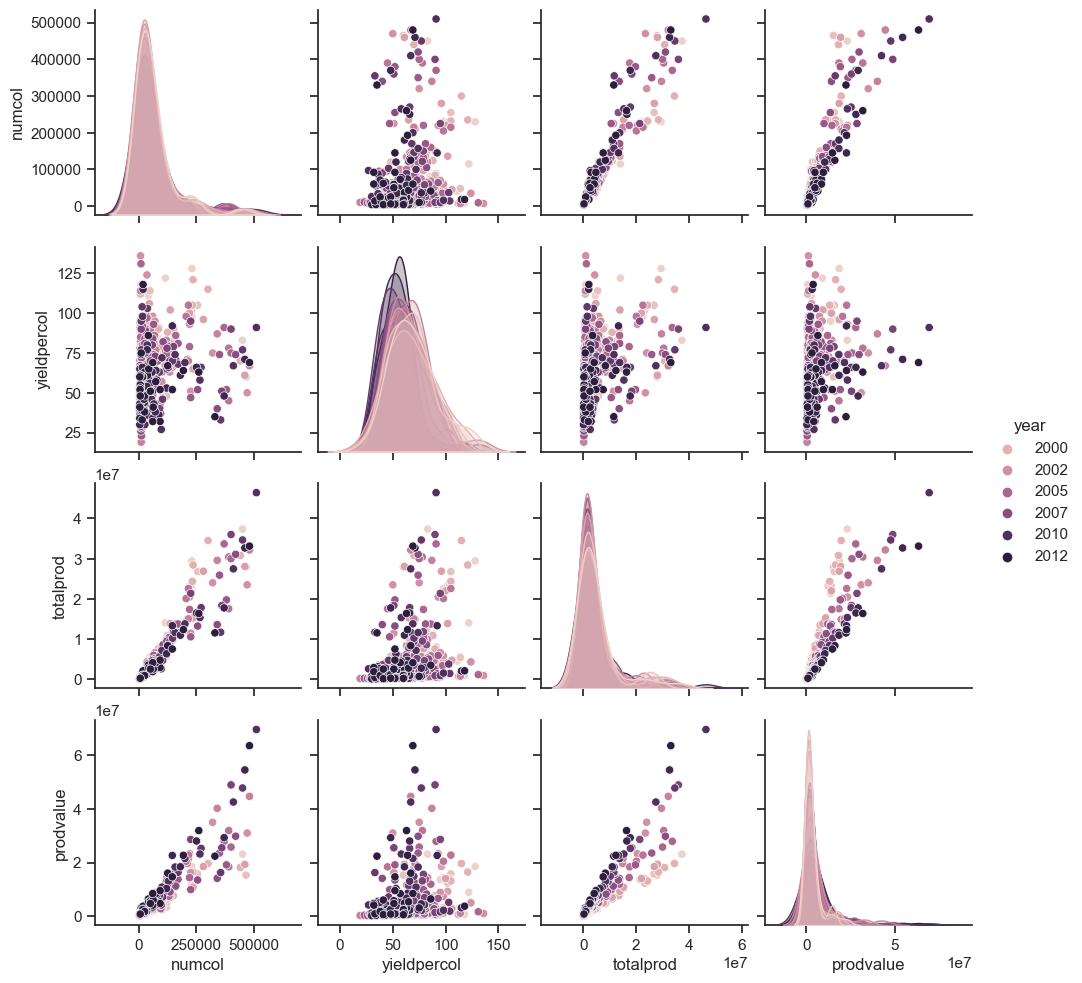

In [23]:
selected_columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']
df_selected = data[selected_columns]

#create pair plot
sns.set(style='ticks')
sns.pairplot(df_selected,hue='year')
plt.show()

# Inference
* Here we can see that number of colonies and total production are highly positvely correlated with the production value.
* Apart from yieldeprcol all other attributes have good amount of correlation with each other.

# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yieldpercol','totalprod', 'stocks', 'priceperlb', 'prodvalue')

In [25]:
correlation_matrix = data.corr()
correlation_matrix

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236,-0.055556
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560,-0.119602
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567,0.693984
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,-0.119602,0.693984,0.139451,1.000000


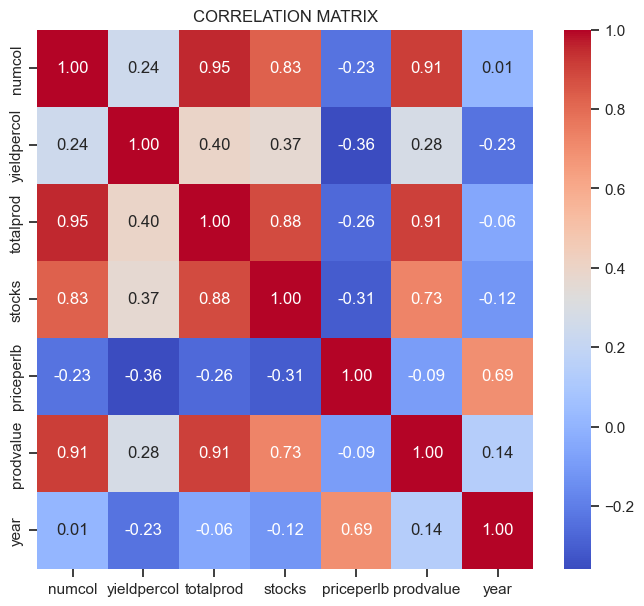

In [26]:
selected_columns = ['numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue']
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title("CORRELATION MATRIX")
plt.show()

# Inference
* We can see that the total production has the highest positive correlation with all the attributes in the data set.